In [34]:
%load_ext lab_black

In [35]:
# Data taken from experiments
# MA-30000-sexual-64.yml
# AP-30000-sexual-62.yml

In [53]:
import yaml
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams.update({"font.sans-serif": "Arial"})

In [37]:
def read_yml(yml_path):
    with open(yml_path, "rb") as file_:
        return yaml.safe_load(file_)
    return pd.DataFrame(yml["PHENOMAP_SPECS"])

In [38]:
def fuse(yml, geno, theory):
    return (
        pd.DataFrame(yml["PHENOMAP_SPECS"])
        .astype({3: int, 4: float})
        .rename({0: "bittype", 1: "bitpos"}, axis=1)
        .query("bittype == 'neut'")
        .pipe(
            # add timing of the negative effect
            lambda df: df.iloc[::2].merge(df.iloc[1::2, [1, 3]], on="bitpos")
            if theory == "AP"
            else df.rename({3: "3_y"}, axis=1)
        )
        .pipe(
            # concat itself because the genomes are diploid
            lambda df: pd.concat([df, df])
        )
        .assign(g=list(geno.iloc[100:2600]) + list(geno.iloc[2700:]))
        .reset_index(drop=True)
    )

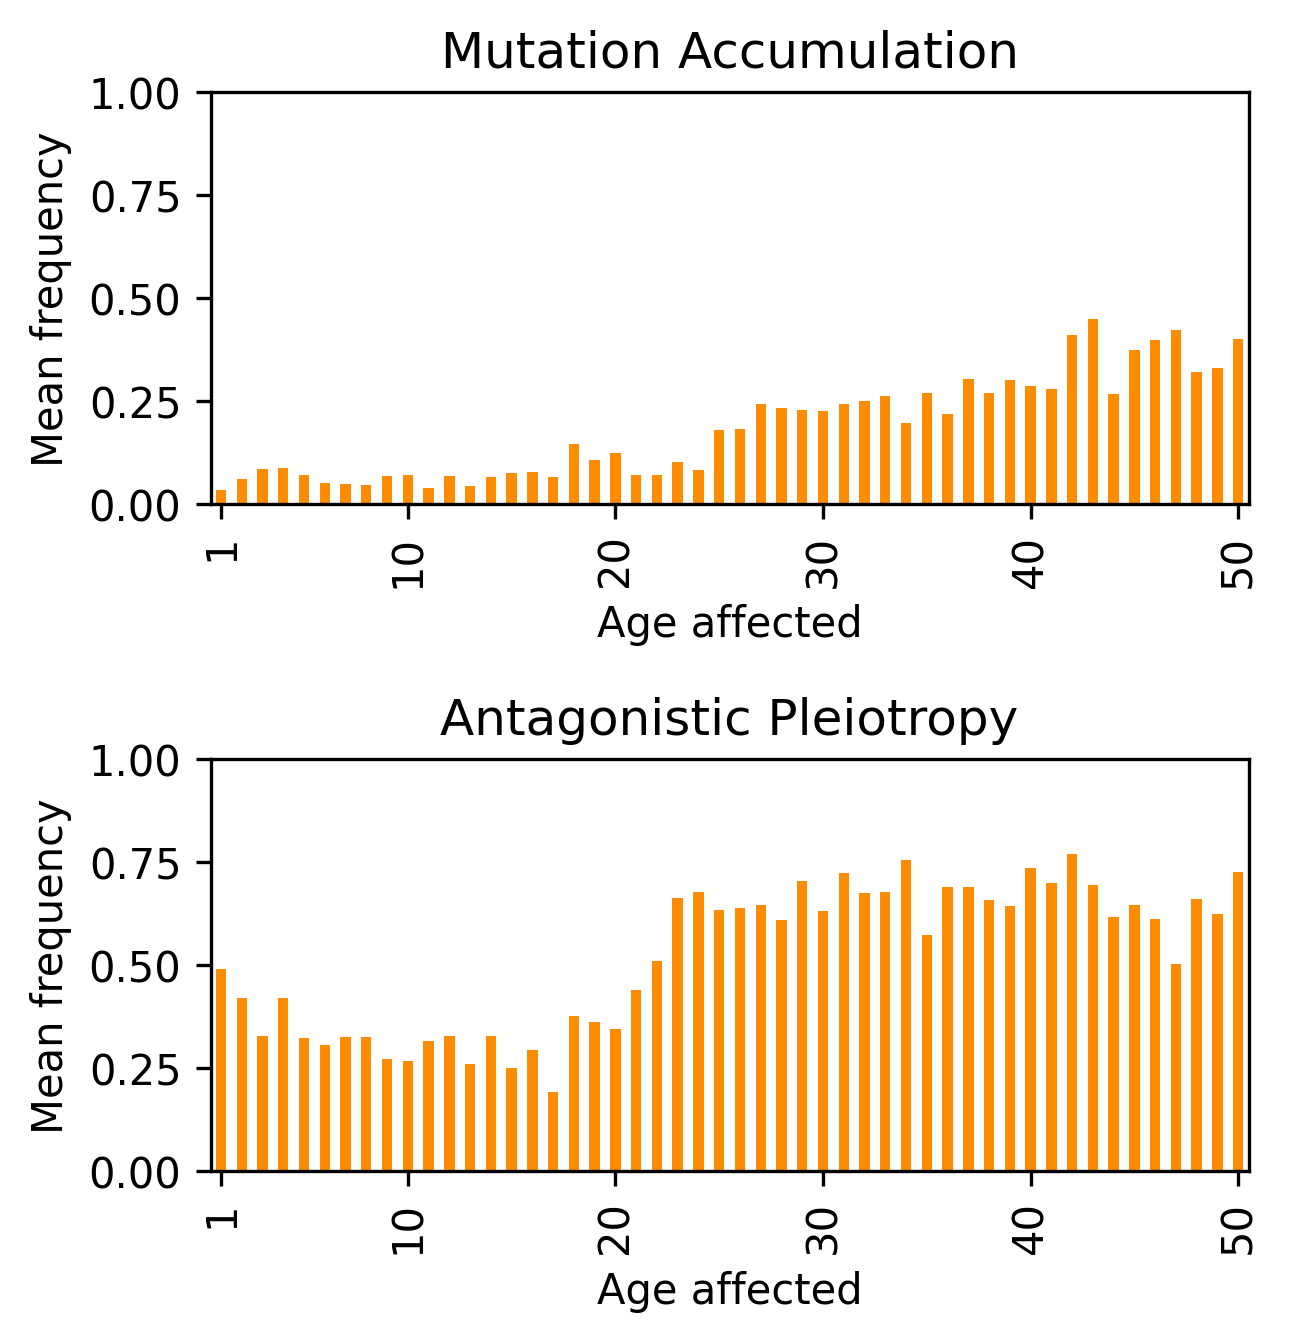

In [6]:
fig, axs = plt.subplots(nrows=2, figsize=(5, 5), dpi=300)
fig.tight_layout(pad=4)

for theory, ax in zip(["MA", "AP"], axs):
    path_yml = f"assets/supp1-phenomap_{theory}.yml"
    path_geno = f"assets/supp1-genotypes_{theory}.csv"

    yml = read_yml(path_yml)
    geno = pd.read_csv(path_geno).iloc[-1]

    # mean frequency of variants that decrease survival rate at age of 3_x
    (
        fuse(yml, geno, theory)
        .groupby("3_y")
        .mean()
        .g.plot.bar(
            ylim=(0, 1),
            ax=ax,
            xlabel="Age affected",
            ylabel="Mean frequency",
            legend=False,
            color="darkorange",
            title="Mutation Accumulation"
            if theory == "MA"
            else "Antagonistic Pleiotropy",
        )
    )
    ax.set(xticks=[0, 9, 19, 29, 39, 49])
fig.savefig("plots/ext1.png")

# Extended Data Figure 3

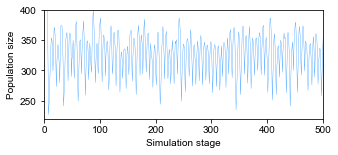

In [59]:
# Simulation data from simulation run assets/ext3.yml
fig, ax = plt.subplots()
(
    pd.read_csv("assets/ext3/0/popgen/simple.csv", header=None, usecols=[0])
    # .iloc[10:]
    .plot(
        ax=ax,
        legend=False,
        ylabel="Population size",
        xlabel="Simulation stage",
        figsize=(5, 2),
        lw=0.3,
        xlim=(0, 500),
        ylim=(220, 400),
        c="dodgerblue",
    )
)
fig.savefig("plots/ext3.png", dpi=300, bbox_inches="tight")